# Classification basée sur des descripteurs Hand-crafted (Kammoun Med Habib & Dhia Elhak Toukebri)

# 1.Détection de caractéristiques

## 1.1Extraire les caractéristiques HOG

####  1.1.1 Fonction pour extraire les caractéristiques HOG (données du Train)

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure

def extract_hog_features(image_path, resize_dim=(128, 128)):
    """
    Extrait les caractéristiques HOG d'une image après redimensionnement.

    Args:
        image_path (str): Chemin de l'image.
        resize_dim (tuple): Dimensions pour redimensionner l'image (par défaut (128, 128)).

    Returns:
        np.array: Vecteur de caractéristiques HOG.
        np.array: Image en niveaux de gris.
        np.array: Image HOG (visualisation des descripteurs).
    """
    # Chargement de l'image
    image = cv2.imread(image_path)
    # Redimensionner l'image à une taille fixe
    image_resized = cv2.resize(image, resize_dim)
    # Conversion en niveaux de gris
    gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Extraction des descripteurs HOG avec visualisation
    features, hog_image = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    # Améliorer la visibilité de l'image HOG
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features, gray, hog_image_rescaled  # Renvoie les descripteurs HOG, l'image grise et l'image HOG

def process_hog_dataset(folder_path, resize_dim=(128, 128)):
    """
    Traite le dossier pour extraire les caractéristiques HOG, avec redimensionnement des images.

    Args:
        folder_path (str): Dossier contenant les sous-dossiers "O" et "R".
        resize_dim (tuple): Dimensions pour redimensionner les images (par défaut (128, 128)).

    Returns:
        np.array: Matrice des caractéristiques HOG.
        np.array: Labels associés (0 pour organique, 1 pour recyclable).
        dict: Dictionnaire des images HOG visualisées.
    """
    features, labels = [], []
    images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images traitées
    hog_images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images HOG
    for label_folder, label in [("O", 0), ("R", 1)]:
        full_path = os.path.join(folder_path, label_folder)
        for image_name in os.listdir(full_path):
            image_path = os.path.join(full_path, image_name)
            feature, gray_image, hog_image_rescaled = extract_hog_features(image_path, resize_dim)
            features.append(feature)
            labels.append(label)
            images[label_folder].append(gray_image)  # Stocke les images traitées
            hog_images[label_folder].append(hog_image_rescaled)  # Stocke les images HOG visualisées
    return np.array(features), np.array(labels), images, hog_images

# Exemple d'utilisation
train_folder = "D:\9raya3\computer vision\g_dechets\g_dechets\Train"  # Mettez ici le chemin vers votre dossier principal
X_train_hog, y_train_hog, images, hog_images = process_hog_dataset(train_folder)
print(f"Caractéristiques HOG extraites : {X_train_hog.shape}")



Caractéristiques HOG extraites : (11816, 1764)


La sortie "Caractéristiques HOG extraites : (11816, 1764)" montre que le jeu de données d'entraînement contient 11 816 images, chacune représentée par un vecteur de 1 764 caractéristiques HOG. Ces caractéristiques sont utilisées pour entraîner un modèle de classification des déchets organiques et recyclables.

####  1.1.2 Fonction pour extraire les caractéristiques HOG (données du Test)

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure

def extract_hog_features(image_path, resize_dim=(128, 128)):
    """
    Extrait les caractéristiques HOG d'une image après redimensionnement.

    Args:
        image_path (str): Chemin de l'image.
        resize_dim (tuple): Dimensions pour redimensionner l'image (par défaut (128, 128)).

    Returns:
        np.array: Vecteur de caractéristiques HOG.
        np.array: Image en niveaux de gris.
        np.array: Image HOG (visualisation des descripteurs).
    """
    # Chargement de l'image
    image = cv2.imread(image_path)
    # Redimensionner l'image à une taille fixe
    image_resized = cv2.resize(image, resize_dim)
    # Conversion en niveaux de gris
    gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Extraction des descripteurs HOG avec visualisation
    features, hog_image = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    # Améliorer la visibilité de l'image HOG
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features, gray, hog_image_rescaled  # Renvoie les descripteurs HOG, l'image grise et l'image HOG

def process_hog_dataset(folder_path, resize_dim=(128, 128)):
    """
    Traite le dossier pour extraire les caractéristiques HOG, avec redimensionnement des images.

    Args:
        folder_path (str): Dossier contenant les sous-dossiers "O" et "R".
        resize_dim (tuple): Dimensions pour redimensionner les images (par défaut (128, 128)).

    Returns:
        np.array: Matrice des caractéristiques HOG.
        np.array: Labels associés (0 pour organique, 1 pour recyclable).
        dict: Dictionnaire des images HOG visualisées.
    """
    features, labels = [], []
    images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images traitées
    hog_images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images HOG
    for label_folder, label in [("O", 0), ("R", 1)]:
        full_path = os.path.join(folder_path, label_folder)
        for image_name in os.listdir(full_path):
            image_path = os.path.join(full_path, image_name)
            feature, gray_image, hog_image_rescaled = extract_hog_features(image_path, resize_dim)
            features.append(feature)
            labels.append(label)
            images[label_folder].append(gray_image)  # Stocke les images traitées
            hog_images[label_folder].append(hog_image_rescaled)  # Stocke les images HOG visualisées
    return np.array(features), np.array(labels), images, hog_images

# Exemple d'utilisation
test_folder = "D:\9raya3\computer vision\g_dechets\g_dechets\Test"  # Mettez ici le chemin vers votre dossier principal
X_test_hog, y_test_hog, images, hog_images = process_hog_dataset(test_folder)
print(f"Caractéristiques HOG extraites : {X_test_hog.shape}")



Caractéristiques HOG extraites : (5064, 1764)


La sortie "Caractéristiques HOG extraites : (5064, 1764)" indique que le jeu de données de test contient 5 064 images, chacune étant représentée par un vecteur de 1 764 caractéristiques HOG

#### 1.1.3 Best features

##### 1.1.3.1 Anova best features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_k_best_features(X_train, y_train, X_test, k=100):
    """
    Sélectionne les k meilleures caractéristiques en utilisant la méthode ANOVA.
    Les mêmes indices sont appliqués aux ensembles d'entraînement et de test.

    Args:
        X_train (np.array): Matrice des caractéristiques d'entraînement.
        y_train (np.array): Labels associés à l'entraînement.
        X_test (np.array): Matrice des caractéristiques de test.
        k (int): Nombre de caractéristiques à sélectionner.

    Returns:
        np.array: Matrice des caractéristiques sélectionnées pour l'entraînement.
        np.array: Matrice des caractéristiques sélectionnées pour le test.
        list: Indices des caractéristiques sélectionnées.
    """
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)  # Ajuster sur l'entraînement
    X_test_selected = selector.transform(X_test)  # Appliquer aux données de test
    selected_indices = selector.get_support(indices=True)
    return X_train_selected, X_test_selected, selected_indices

# Exemple d'utilisation
X_train_selected, X_test_selected, selected_indices = select_k_best_features(X_train_hog, y_train_hog, X_test_hog, k=160)

print(f"Indices des caractéristiques sélectionnées : {selected_indices}")
print(f"Forme après sélection (train) : {X_train_selected.shape}")
print(f"Forme après sélection (test) : {X_test_selected.shape}")


Indices des caractéristiques sélectionnées : [  37   55   73   88  115  118  124  127  142  160  196  214  223  250
  271  307  343  352  358  361  370  376  379  394  397  415  430  448
  466  484  502  505  523  559  586  592  595  613  619  622  628  631
  646  649  655  682  718  736  754  757  766  775  784  793  802  811
  812  820  829  838  847  853  856  862  865  871  874  880  883  889
  892  898  907  916  919  934  943  952  961  969  970  979  988  997
 1006 1009 1018 1019 1027 1033 1045 1046 1054 1063 1081 1087 1090 1099
 1108 1114 1117 1123 1126 1132 1135 1141 1144 1150 1159 1168 1171 1177
 1186 1195 1203 1204 1222 1231 1240 1252 1258 1261 1267 1270 1279 1285
 1297 1306 1333 1342 1348 1375 1378 1393 1402 1411 1414 1420 1429 1447
 1456 1483 1486 1492 1504 1510 1513 1519 1531 1537 1567 1573 1627 1663
 1702 1720 1738 1744 1756 1762]
Forme après sélection (train) : (11816, 160)
Forme après sélection (test) : (5064, 160)


Nous avons utilisé la méthode **ANOVA** pour sélectionner les 160 meilleures caractéristiques parmi les descripteurs HOG. Cette sélection a réduit la dimensionnalité des données :

* Données d'entraînement : De (11816, 1764) à (11816, 160)
* Données de test : De (5064, 1764) à (5064, 160)

Les caractéristiques les plus pertinentes ont été sélectionnées, ce qui améliore l'efficacité du modèle sans perdre d'informations importantes

##### 1.1.3.2 Random forest best features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def feature_importance_random_forest(X_train, y_train, X_test, n_features=160):
    """
    Sélectionne les caractéristiques importantes en utilisant Random Forest.

    Args:
        X_train (np.array): Matrice des caractéristiques d'entraînement.
        y_train (np.array): Labels d'entraînement associés.
        X_test (np.array): Matrice des caractéristiques de test.
        n_features (int): Nombre de caractéristiques les plus importantes à conserver.

    Returns:
        np.array: Matrices des caractéristiques sélectionnées pour l'entraînement et le test.
        list: Indices des caractéristiques importantes.
    """
    # Entraîner le modèle sur les données d'entraînement
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Importance des caractéristiques
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1][:n_features]

    # Sélectionner les n caractéristiques les plus importantes pour les deux ensembles
    X_train_selected = X_train[:, indices]
    X_test_selected = X_test[:, indices]

    return X_train_selected, X_test_selected, indices

# Exemple d'utilisation
X_train_rf_selected, X_test_rf_selected, important_indices = feature_importance_random_forest(X_train_hog, y_train_hog, X_test_hog, n_features=50)
print(f"Indices des caractéristiques importantes : {important_indices}")
print(f"Forme après sélection pour l'entraînement : {X_train_rf_selected.shape}")
print(f"Forme après sélection pour le test : {X_test_rf_selected.shape}")


Indices des caractéristiques importantes : [ 997 1486  820 1117  934  616  856  961 1177 1240 1171  793 1006  991
  736  718 1081 1378  394  811 1231 1033  775  812  841  829  904  652
 1168 1195  952  379 1046  586  745  382 1538  847  568  607  559 1411
 1159 1087 1045 1204 1405 1114  421 1090]
Forme après sélection pour l'entraînement : (11816, 50)
Forme après sélection pour le test : (5064, 50)


Nous avons utilisé un **Random Forest** pour identifier les 50 caractéristiques les plus importantes parmi les descripteurs HOG. Cette approche permet de concentrer l'attention sur les caractéristiques ayant un impact significatif sur la prédiction, tout en réduisant la dimensionnalité des données :

* Données d'entraînement : De (11816, 160) à (11816, 50)
* Données de test : De (5064, 160) à (5064, 50)

#### 1.1.4 Analyse d'Images avec les Descripteurs HOG : Traitement et Visualisation

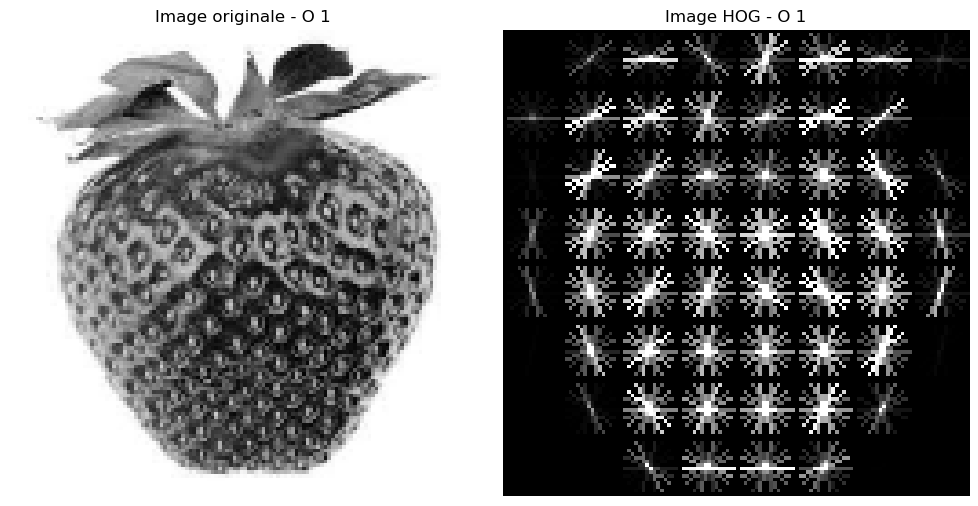

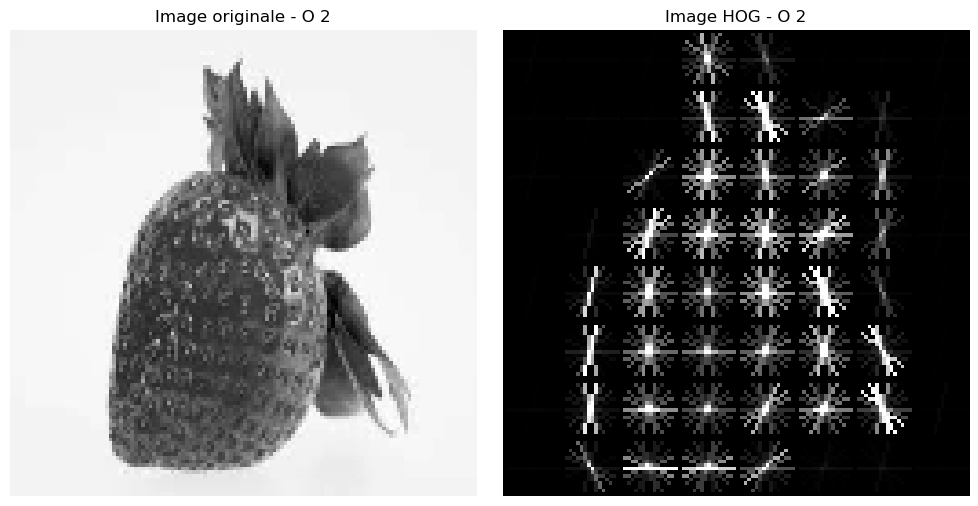

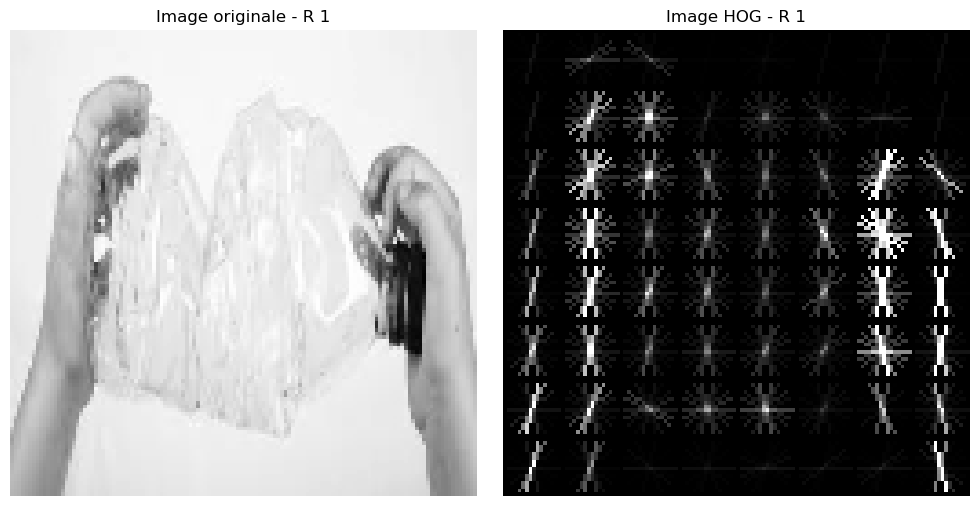

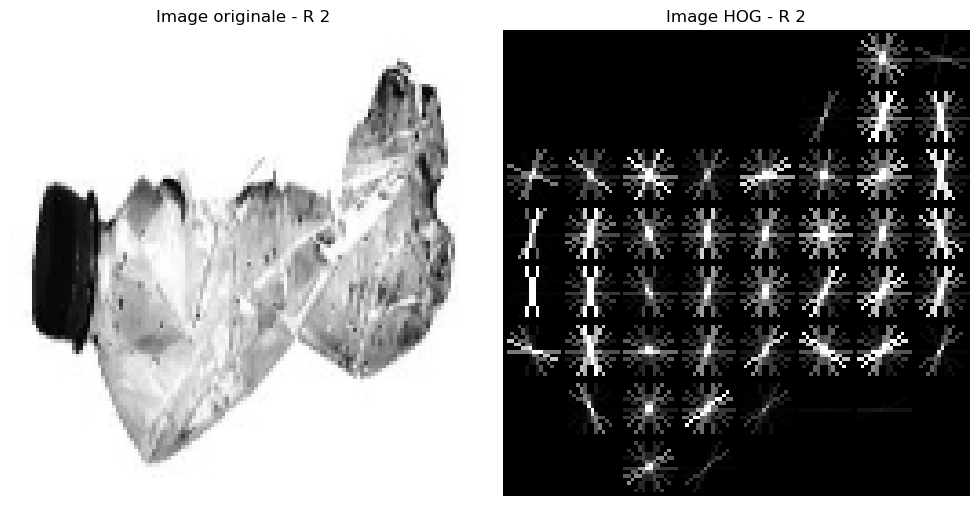

In [ ]:
# Visualisation de 2 images R et 2 images O avec leurs images HOG
count_r = 0  # Compteur pour les images recyclables
count_o = 0  # Compteur pour les images organiques

for label_folder in hog_images:
    for i, hog_img in enumerate(hog_images[label_folder]):
        # Limiter à 2 images par catégorie
        if label_folder == 'R' and count_r < 2:
            plt.figure(figsize=(10, 5))

            # Affichage de l'image originale (en niveaux de gris)
            plt.subplot(1, 2, 1)
            plt.imshow(images[label_folder][i], cmap=plt.cm.gray)
            plt.title(f"Image originale - {label_folder} {i+1}")
            plt.axis('off')

            # Affichage de l'image HOG
            plt.subplot(1, 2, 2)
            plt.imshow(hog_img, cmap=plt.cm.gray)
            plt.title(f"Image HOG - {label_folder} {i+1}")
            plt.axis('off')

            # Afficher les deux images côte à côte
            plt.tight_layout()
            plt.show()
            count_r += 1

        if label_folder == 'O' and count_o < 2:
            plt.figure(figsize=(10, 5))

            # Affichage de l'image originale (en niveaux de gris)
            plt.subplot(1, 2, 1)
            plt.imshow(images[label_folder][i], cmap=plt.cm.gray)
            plt.title(f"Image originale - {label_folder} {i+1}")
            plt.axis('off')

            # Affichage de l'image HOG
            plt.subplot(1, 2, 2)
            plt.imshow(hog_img, cmap=plt.cm.gray)
            plt.title(f"Image HOG - {label_folder} {i+1}")
            plt.axis('off')

            # Afficher les deux images côte à côte
            plt.tight_layout()
            plt.show()
            count_o += 1

        # Arrêter après 2 images pour chaque catégorie
        if count_r == 2 and count_o == 2:
            break
    if count_r == 2 and count_o == 2:
        break


#### 1.1.5 Apprentissage des modéles pour les données de HOG

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


print(f"y_train_hog shape: {y_train_hog.shape}")
print(f"y_test_hog shape: {y_test_hog.shape}")

X_train_initial, X_test_initial, y_train_initial, y_test_initial = X_train_hog, X_test_hog, y_train_hog, y_test_hog
X_train_selectk, X_test_selectk, y_train_selectk, y_test_selectk = X_train_selected, X_test_selected, y_train_hog, y_test_hog
X_train_rf, X_test_rf, y_train_rf, y_test_rf = X_train_rf_selected, X_test_rf_selected, y_train_hog, y_test_hog


# Initialisation des modèles
models = {
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Fonction pour entraîner et évaluer un modèle
def evaluate_model(model, X_train, X_test, y_train, y_test, label):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== Classification Report ({label}) ===")
    print(classification_report(y_test, y_pred))
    return classification_report(y_test, y_pred, output_dict=True)

# Comparaison des performances
results = {}
for model_name, model in models.items():
    print(f"=== Modèle : {model_name} ===")

    # Avant sélection des caractéristiques
    print("\nAvant sélection des caractéristiques :")
    report_initial = evaluate_model(model, X_train_initial, X_test_initial, y_train_initial, y_test_initial, "Initial")

    # Après sélection des caractéristiques (SelectKBest)
    print("\nAprès sélection des caractéristiques (SelectKBest) :")
    report_selectk = evaluate_model(model, X_train_selectk, X_test_selectk, y_train_selectk, y_test_selectk, "SelectKBest")

    # Après sélection des caractéristiques (Random Forest)
    print("\nAprès sélection des caractéristiques (Random Forest) :")
    report_rf = evaluate_model(model, X_train_rf, X_test_rf, y_train_rf, y_test_rf, "Random Forest")

    # Stockage des résultats pour comparaison
    results[model_name] = {
        "Initial": report_initial,
        "SelectKBest": report_selectk,
        "Random Forest": report_rf
    }

# Affichage des performances comparées
for model_name, performance in results.items():
    print(f"\n=== Comparaison des performances pour {model_name} ===")
    print("Accuracy Initial :", performance["Initial"]["accuracy"])
    print("Accuracy SelectKBest :", performance["SelectKBest"]["accuracy"])
    print("Accuracy Random Forest :", performance["Random Forest"]["accuracy"])
    print("\n")


y_train_hog shape: (11816,)
y_test_hog shape: (5064,)
=== Modèle : SVM ===

Avant sélection des caractéristiques :
=== Classification Report (Initial) ===
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2931
           1       0.80      0.72      0.76      2133

    accuracy                           0.81      5064
   macro avg       0.80      0.79      0.80      5064
weighted avg       0.81      0.81      0.80      5064


Après sélection des caractéristiques (SelectKBest) :
=== Classification Report (SelectKBest) ===
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2931
           1       0.78      0.68      0.73      2133

    accuracy                           0.79      5064
   macro avg       0.79      0.77      0.78      5064
weighted avg       0.79      0.79      0.78      5064


Après sélection des caractéristiques (Random Forest) :
=== Classification Report (Random For

#### 1.1.6 Tableau de comparaison des performances (Accuracy et F1-score)

<table>
  <thead>
    <tr>
      <th><strong>Modèle</strong></th>
      <th><strong>Avant Sélection des Caractéristiques</strong></th>
      <th><strong>Après SelectKBest</strong></th>
      <th><strong>Après Random Forest</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>SVM</strong></td>
      <td><strong>Accuracy</strong>: 0.805<br><strong>F1-score (Macro)</strong>: 0.80</td>
      <td><strong>Accuracy</strong>: 0.786<br><strong>F1-score (Macro)</strong>: 0.78</td>
      <td><strong>Accuracy</strong>: 0.772<br><strong>F1-score (Macro)</strong>: 0.77</td>
    </tr>
    <tr>
      <td><strong>Random Forest</strong></td>
      <td><strong>Accuracy</strong>: 0.807<br><strong>F1-score (Macro)</strong>: 0.80</td>
      <td><strong>Accuracy</strong>: 0.789<br><strong>F1-score (Macro)</strong>: 0.79</td>
      <td><strong>Accuracy</strong>: 0.780<br><strong>F1-score (Macro)</strong>: 0.78</td>
    </tr>
    <tr>
      <td><strong>Gradient Boosting</strong></td>
      <td><strong>Accuracy</strong>: 0.814<br><strong>F1-score (Macro)</strong>: 0.81</td>
      <td><strong>Accuracy</strong>: 0.787<br><strong>F1-score (Macro)</strong>: 0.79</td>
      <td><strong>Accuracy</strong>: 0.778<br><strong>F1-score (Macro)</strong>: 0.78</td>
    </tr>
  </tbody>
</table>


<ul>
  <li><strong>Le modèle Gradient Boosting</strong> est le plus performant avant la sélection des caractéristiques, avec une <strong>accuracy</strong> de 81.4% et un <strong>F1-score</strong> de 0.81. Cependant, après la sélection des caractéristiques, ses performances ont légèrement diminué.</li>
  <li><strong>L'impact de la sélection des caractéristiques</strong> via SelectKBest et Random Forest a varié d'un modèle à l'autre. Globalement, la performance a tendance à se dégrader, notamment pour le modèle <strong>SVM</strong>, où la sélection des caractéristiques a entraîné une diminution notable de l'accuracy et du F1-score.</li>
  <li>En général, la <strong>sélection des caractéristiques</strong> n'a pas montré d'amélioration significative de la performance, et dans certains cas, elle a même conduit à une perte d'information, surtout dans les modèles moins robustes comme <strong>SVM</strong> et <strong>Random Forest</strong>.</li>
</ul>


## 1.2 Extraire les caractéristiques LBP

####  1.2.1 Fonction pour extraire les caractéristiques LBP (données du Train)

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def extract_lbp_features(image_path, resize_dim=(128, 128), radius=1, n_points=8):
    """
    Extrait les caractéristiques LBP d'une image après redimensionnement.

    Args:
        image_path (str): Chemin de l'image.
        resize_dim (tuple): Dimensions pour redimensionner l'image (par défaut (128, 128)).
        radius (int): Rayon du voisinage pour LBP (par défaut 1).
        n_points (int): Nombre de voisins pour LBP (par défaut 8).

    Returns:
        np.array: Vecteur de caractéristiques LBP (histogramme).
        np.array: Image en niveaux de gris.
        np.array: Image LBP (visualisation des descripteurs).
    """
    # Chargement de l'image
    image = cv2.imread(image_path)
    # Redimensionner l'image à une taille fixe
    image_resized = cv2.resize(image, resize_dim)
    # Conversion en niveaux de gris
    gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

    # Extraction des descripteurs LBP
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

    # Calcul de l'histogramme des descripteurs LBP
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points+3), range=(0, n_points+2))

    # Normalisation de l'histogramme
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    return lbp_hist, gray, lbp  # Renvoie l'histogramme LBP, l'image grise et l'image LBP

def process_lbp_dataset(folder_path, resize_dim=(128, 128), radius=1, n_points=8):
    """
    Traite le dossier pour extraire les caractéristiques LBP, avec redimensionnement des images.

    Args:
        folder_path (str): Dossier contenant les sous-dossiers "O" et "R".
        resize_dim (tuple): Dimensions pour redimensionner les images (par défaut (128, 128)).
        radius (int): Rayon du voisinage pour LBP (par défaut 1).
        n_points (int): Nombre de voisins pour LBP (par défaut 8).

    Returns:
        np.array: Matrice des caractéristiques LBP.
        np.array: Labels associés (0 pour organique, 1 pour recyclable).
        dict: Dictionnaire des images LBP visualisées.
    """
    features, labels = [], []
    images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images traitées
    lbp_images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images LBP
    for label_folder, label in [("O", 0), ("R", 1)]:
        full_path = os.path.join(folder_path, label_folder)
        for image_name in os.listdir(full_path):
            image_path = os.path.join(full_path, image_name)
            feature, gray_image, lbp_image = extract_lbp_features(image_path, resize_dim, radius, n_points)
            features.append(feature)
            labels.append(label)
            images[label_folder].append(gray_image)  # Stocke les images traitées
            lbp_images[label_folder].append(lbp_image)  # Stocke les images LBP visualisées
    return np.array(features), np.array(labels), images, lbp_images

# Exemple d'utilisation
train_folder = "D:/9raya3/computer vision/g_dechets/g_dechets/Train"  # Mettez ici le chemin vers votre dossier principal
X_train_lbp, y_train_lbp, images, lbp_images = process_lbp_dataset(train_folder)

# Affichage des dimensions des caractéristiques extraites
print(f"Caractéristiques LBP extraites : {X_train_lbp.shape}")


Caractéristiques LBP extraites : (11816, 10)


####  1.2.2 Fonction pour extraire les caractéristiques LBP (données du test)

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def extract_lbp_features(image_path, resize_dim=(128, 128), radius=1, n_points=8):
    """
    Extrait les caractéristiques LBP d'une image après redimensionnement.

    Args:
        image_path (str): Chemin de l'image.
        resize_dim (tuple): Dimensions pour redimensionner l'image (par défaut (128, 128)).
        radius (int): Rayon du voisinage pour LBP (par défaut 1).
        n_points (int): Nombre de voisins pour LBP (par défaut 8).

    Returns:
        np.array: Vecteur de caractéristiques LBP (histogramme).
        np.array: Image en niveaux de gris.
        np.array: Image LBP (visualisation des descripteurs).
    """
    # Chargement de l'image
    image = cv2.imread(image_path)
    # Redimensionner l'image à une taille fixe
    image_resized = cv2.resize(image, resize_dim)
    # Conversion en niveaux de gris
    gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

    # Extraction des descripteurs LBP
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

    # Calcul de l'histogramme des descripteurs LBP
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points+3), range=(0, n_points+2))

    # Normalisation de l'histogramme
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    return lbp_hist, gray, lbp  # Renvoie l'histogramme LBP, l'image grise et l'image LBP

def process_lbp_dataset(folder_path, resize_dim=(128, 128), radius=1, n_points=8):
    """
    Traite le dossier pour extraire les caractéristiques LBP, avec redimensionnement des images.

    Args:
        folder_path (str): Dossier contenant les sous-dossiers "O" et "R".
        resize_dim (tuple): Dimensions pour redimensionner les images (par défaut (128, 128)).
        radius (int): Rayon du voisinage pour LBP (par défaut 1).
        n_points (int): Nombre de voisins pour LBP (par défaut 8).

    Returns:
        np.array: Matrice des caractéristiques LBP.
        np.array: Labels associés (0 pour organique, 1 pour recyclable).
        dict: Dictionnaire des images LBP visualisées.
    """
    features, labels = [], []
    images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images traitées
    lbp_images = {'O': [], 'R': []}  # Dictionnaire pour stocker les images LBP
    for label_folder, label in [("O", 0), ("R", 1)]:
        full_path = os.path.join(folder_path, label_folder)
        for image_name in os.listdir(full_path):
            image_path = os.path.join(full_path, image_name)
            feature, gray_image, lbp_image = extract_lbp_features(image_path, resize_dim, radius, n_points)
            features.append(feature)
            labels.append(label)
            images[label_folder].append(gray_image)  # Stocke les images traitées
            lbp_images[label_folder].append(lbp_image)  # Stocke les images LBP visualisées
    return np.array(features), np.array(labels), images, lbp_images

# Exemple d'utilisation
train_folder = "D:/9raya3/computer vision/g_dechets/g_dechets/Test"  # Mettez ici le chemin vers votre dossier principal
X_test_lbp, y_test_lbp, images, lbp_images = process_lbp_dataset(train_folder)

# Affichage des dimensions des caractéristiques extraites
print(f"Caractéristiques LBP extraites : {X_test_lbp.shape}")


Caractéristiques LBP extraites : (5064, 10)


#### 1.2.3 Best features

##### 1.2.3.1 Anova best features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_k_best_features(X_train, y_train, X_test, k=100):
    """
    Sélectionne les k meilleures caractéristiques en utilisant la méthode ANOVA.
    Les mêmes indices sont appliqués aux ensembles d'entraînement et de test.

    Args:
        X_train (np.array): Matrice des caractéristiques d'entraînement.
        y_train (np.array): Labels associés à l'entraînement.
        X_test (np.array): Matrice des caractéristiques de test.
        k (int): Nombre de caractéristiques à sélectionner.

    Returns:
        np.array: Matrice des caractéristiques sélectionnées pour l'entraînement.
        np.array: Matrice des caractéristiques sélectionnées pour le test.
        list: Indices des caractéristiques sélectionnées.
    """
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)  # Ajuster sur l'entraînement
    X_test_selected = selector.transform(X_test)  # Appliquer aux données de test
    selected_indices = selector.get_support(indices=True)
    return X_train_selected, X_test_selected, selected_indices

# Exemple d'utilisation
X_train_selecteda, X_test_selecteda, selected_indicesa = select_k_best_features(X_train_lbp, y_train_lbp, X_test_lbp, k=160)

print(f"Indices des caractéristiques sélectionnées : {selected_indices}")
print(f"Forme après sélection (train) : {X_train_selecteda.shape}")
print(f"Forme après sélection (test) : {X_test_selecteda.shape}")


Indices des caractéristiques sélectionnées : [  37   55   73   88  115  118  124  127  142  160  196  214  223  250
  271  307  343  352  358  361  370  376  379  394  397  415  430  448
  466  484  502  505  523  559  586  592  595  613  619  622  628  631
  646  649  655  682  718  736  754  757  766  775  784  793  802  811
  812  820  829  838  847  853  856  862  865  871  874  880  883  889
  892  898  907  916  919  934  943  952  961  969  970  979  988  997
 1006 1009 1018 1019 1027 1033 1045 1046 1054 1063 1081 1087 1090 1099
 1108 1114 1117 1123 1126 1132 1135 1141 1144 1150 1159 1168 1171 1177
 1186 1195 1203 1204 1222 1231 1240 1252 1258 1261 1267 1270 1279 1285
 1297 1306 1333 1342 1348 1375 1378 1393 1402 1411 1414 1420 1429 1447
 1456 1483 1486 1492 1504 1510 1513 1519 1531 1537 1567 1573 1627 1663
 1702 1720 1738 1744 1756 1762]
Forme après sélection (train) : (11816, 10)
Forme après sélection (test) : (5064, 10)


C:\Users\habou\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=160 is greater than n_features=10. All the features will be returned.
  warnings.warn(


##### 1.2.3.2 Random forest best features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def feature_importance_random_forest(X_train, y_train, X_test, n_features=160):
    """
    Sélectionne les caractéristiques importantes en utilisant Random Forest.

    Args:
        X_train (np.array): Matrice des caractéristiques d'entraînement.
        y_train (np.array): Labels d'entraînement associés.
        X_test (np.array): Matrice des caractéristiques de test.
        n_features (int): Nombre de caractéristiques les plus importantes à conserver.

    Returns:
        np.array: Matrices des caractéristiques sélectionnées pour l'entraînement et le test.
        list: Indices des caractéristiques importantes.
    """
    # Entraîner le modèle sur les données d'entraînement
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Importance des caractéristiques
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1][:n_features]

    # Sélectionner les n caractéristiques les plus importantes pour les deux ensembles
    X_train_selected = X_train[:, indices]
    X_test_selected = X_test[:, indices]

    return X_train_selected, X_test_selected, indices

# Exemple d'utilisation
X_train_rf_selecteda, X_test_rf_selecteda, important_indicesa = feature_importance_random_forest(X_train_lbp, y_train_lbp, X_test_lbp, n_features=50)
print(f"Indices des caractéristiques importantes : {important_indicesa}")
print(f"Forme après sélection pour l'entraînement : {X_train_rf_selecteda.shape}")
print(f"Forme après sélection pour le test : {X_test_rf_selecteda.shape}")


Indices des caractéristiques importantes : [2 3 8 0 7 6 1 5 4 9]
Forme après sélection pour l'entraînement : (11816, 10)
Forme après sélection pour le test : (5064, 10)


#### 1.2.4 Analyse d'Images avec les Descripteurs HOG : Traitement et Visualisation

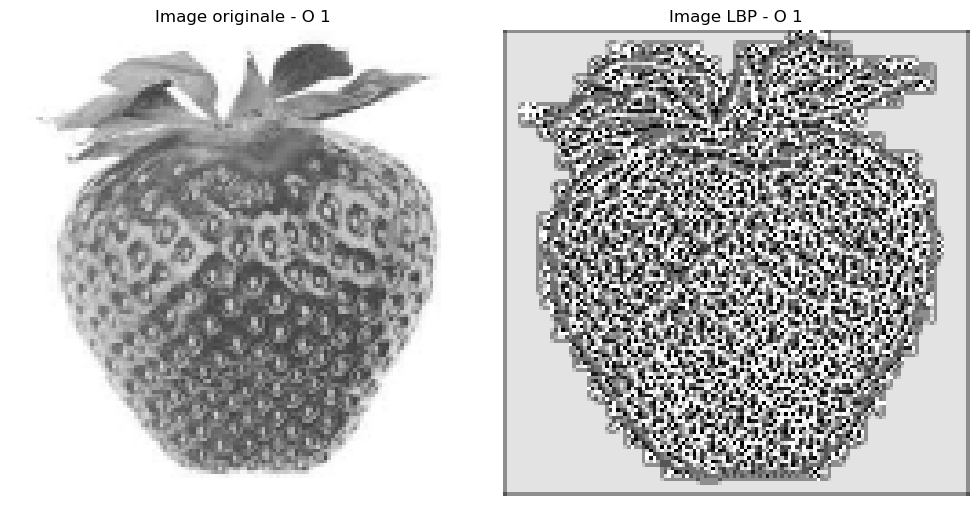

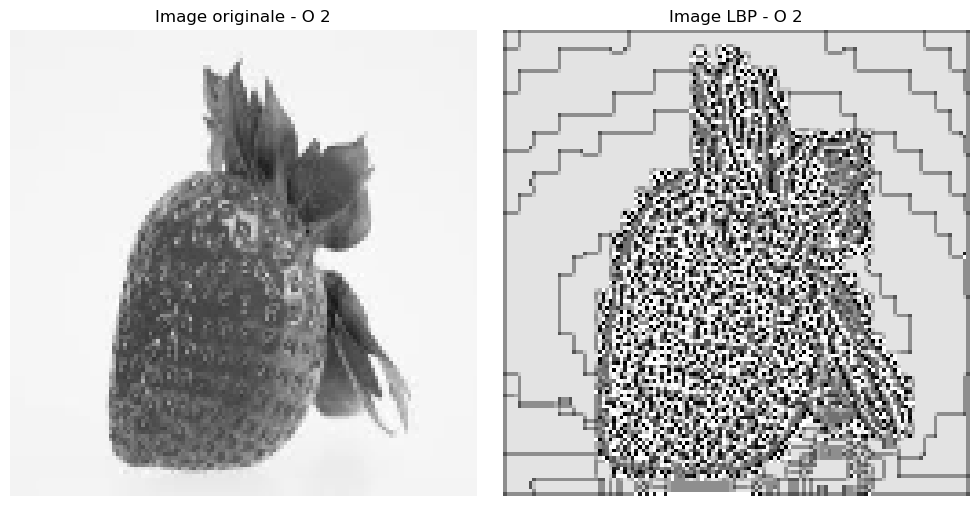

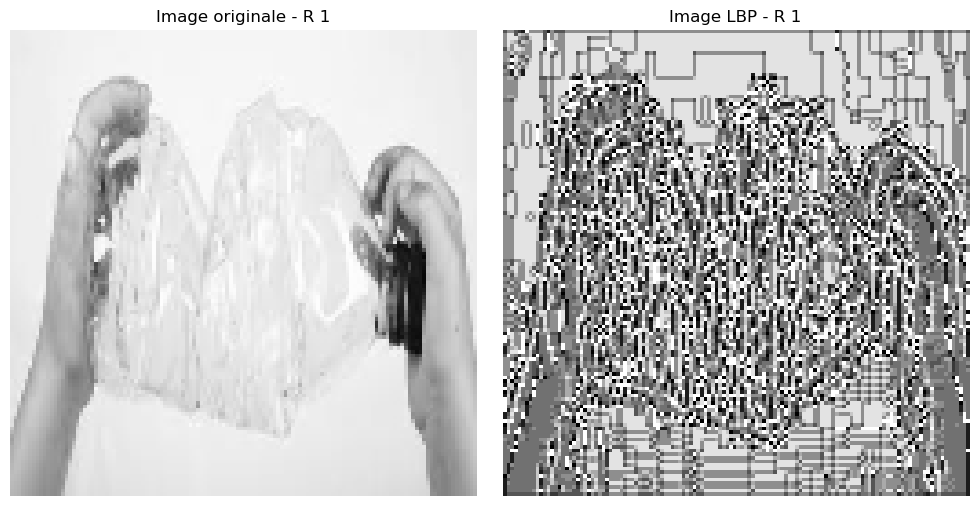

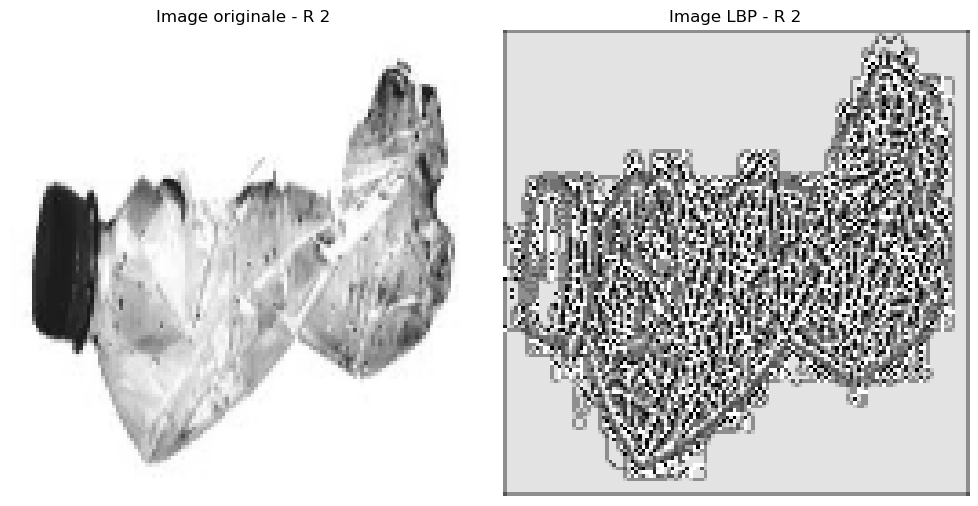

In [ ]:
# Affichage des images originales et des images LBP
count_r = 0  # Compteur pour les images recyclables
count_o = 0  # Compteur pour les images organiques

for label_folder in lbp_images:
    for i, lbp_img in enumerate(lbp_images[label_folder]):
        # Limiter à 2 images par catégorie
        if label_folder == 'R' and count_r < 2:
            plt.figure(figsize=(10, 5))

            # Affichage de l'image originale (en niveaux de gris)
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(images[label_folder][i], cv2.COLOR_BGR2RGB))
            plt.title(f"Image originale - {label_folder} {i+1}")
            plt.axis('off')

            # Affichage de l'image LBP
            plt.subplot(1, 2, 2)
            plt.imshow(lbp_img, cmap=plt.cm.gray)
            plt.title(f"Image LBP - {label_folder} {i+1}")
            plt.axis('off')

            # Afficher les deux images côte à côte
            plt.tight_layout()
            plt.show()
            count_r += 1

        if label_folder == 'O' and count_o < 2:
            plt.figure(figsize=(10, 5))

            # Affichage de l'image originale (en niveaux de gris)
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(images[label_folder][i], cv2.COLOR_BGR2RGB))
            plt.title(f"Image originale - {label_folder} {i+1}")
            plt.axis('off')

            # Affichage de l'image LBP
            plt.subplot(1, 2, 2)
            plt.imshow(lbp_img, cmap=plt.cm.gray)
            plt.title(f"Image LBP - {label_folder} {i+1}")
            plt.axis('off')

            # Afficher les deux images côte à côte
            plt.tight_layout()
            plt.show()
            count_o += 1

        # Arrêter après 2 images pour chaque catégorie
        if count_r == 2 and count_o == 2:
            break
    if count_r == 2 and count_o == 2:
        break


#### 1.2.5 Apprentissage des modéles pour les données de LBP

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


print(f"y_train_hog shape: {y_train_hog.shape}")
print(f"y_test_hog shape: {y_test_hog.shape}")

X_train_initial, X_test_initial, y_train_initial, y_test_initial = X_train_lbp, X_test_lbp, y_train_lbp, y_test_lbp
X_train_selectk, X_test_selectk, y_train_selectk, y_test_selectk = X_train_selecteda, X_test_selecteda, y_train_lbp, y_test_lbp
X_train_rf, X_test_rf, y_train_rf, y_test_rf = X_train_rf_selecteda, X_test_rf_selecteda, y_train_lbp, y_test_lbp


# Initialisation des modèles
models = {
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Fonction pour entraîner et évaluer un modèle
def evaluate_model(model, X_train, X_test, y_train, y_test, label):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== Classification Report ({label}) ===")
    print(classification_report(y_test, y_pred))
    return classification_report(y_test, y_pred, output_dict=True)

# Comparaison des performances
results = {}
for model_name, model in models.items():
    print(f"=== Modèle : {model_name} ===")

    # Avant sélection des caractéristiques
    print("\nAvant sélection des caractéristiques :")
    report_initial = evaluate_model(model, X_train_initial, X_test_initial, y_train_initial, y_test_initial, "Initial")

    # Après sélection des caractéristiques (SelectKBest)
    print("\nAprès sélection des caractéristiques (SelectKBest) :")
    report_selectk = evaluate_model(model, X_train_selectk, X_test_selectk, y_train_selectk, y_test_selectk, "SelectKBest")

    # Après sélection des caractéristiques (Random Forest)
    print("\nAprès sélection des caractéristiques (Random Forest) :")
    report_rf = evaluate_model(model, X_train_rf, X_test_rf, y_train_rf, y_test_rf, "Random Forest")

    # Stockage des résultats pour comparaison
    results[model_name] = {
        "Initial": report_initial,
        "SelectKBest": report_selectk,
        "Random Forest": report_rf
    }

# Affichage des performances comparées
for model_name, performance in results.items():
    print(f"\n=== Comparaison des performances pour {model_name} ===")
    print("Accuracy Initial :", performance["Initial"]["accuracy"])
    print("Accuracy SelectKBest :", performance["SelectKBest"]["accuracy"])
    print("Accuracy Random Forest :", performance["Random Forest"]["accuracy"])
    print("\n")


y_train_hog shape: (11816,)
y_test_hog shape: (5064,)
=== Modèle : SVM ===

Avant sélection des caractéristiques :
=== Classification Report (Initial) ===
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2931
           1       0.69      0.68      0.69      2133

    accuracy                           0.74      5064
   macro avg       0.73      0.73      0.73      5064
weighted avg       0.74      0.74      0.74      5064


Après sélection des caractéristiques (SelectKBest) :
=== Classification Report (SelectKBest) ===
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2931
           1       0.69      0.68      0.69      2133

    accuracy                           0.74      5064
   macro avg       0.73      0.73      0.73      5064
weighted avg       0.74      0.74      0.74      5064


Après sélection des caractéristiques (Random Forest) :
=== Classification Report (Random For

#### 1.2.6 Tableau de comparaison des performances (Accuracy et F1-score)

<table>
  <thead>
    <tr>
      <th><strong>Modèle</strong></th>
      <th><strong>Avant Sélection des Caractéristiques</strong></th>
      <th><strong>Après SelectKBest</strong></th>
      <th><strong>Après Random Forest</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>SVM</strong></td>
      <td><strong>Accuracy</strong>: 0.7397<br><strong>F1-score (Macro)</strong>: 0.73</td>
      <td><strong>Accuracy</strong>: 0.7397<br><strong>F1-score (Macro)</strong>: 0.73</td>
      <td><strong>Accuracy</strong>: 0.7397<br><strong>F1-score (Macro)</strong>: 0.73</td>
    </tr>
    <tr>
      <td><strong>Random Forest</strong></td>
      <td><strong>Accuracy</strong>: 0.8059<br><strong>F1-score (Macro)</strong>: 0.80</td>
      <td><strong>Accuracy</strong>: 0.8059<br><strong>F1-score (Macro)</strong>: 0.80</td>
      <td><strong>Accuracy</strong>: 0.8051<br><strong>F1-score (Macro)</strong>: 0.80</td>
    </tr>
    <tr>
      <td><strong>Gradient Boosting</strong></td>
      <td><strong>Accuracy</strong>: 0.8035<br><strong>F1-score (Macro)</strong>: 0.80</td>
      <td><strong>Accuracy</strong>: 0.8035<br><strong>F1-score (Macro)</strong>: 0.80</td>
      <td><strong>Accuracy</strong>: 0.8037<br><strong>F1-score (Macro)</strong>: 0.80</td>
    </tr>
  </tbody>
</table>


<ul> <li><strong>Le modèle Random Forest</strong> est le plus performant, avec une <strong>accuracy</strong> de 80.59% et un <strong>F1-score (Macro)</strong> de 0.80, avant et après la sélection des caractéristiques. Cependant, une légère baisse de performance a été observée après l'application de Random Forest pour la sélection des caractéristiques.</li> <li><strong>L'impact de la sélection des caractéristiques</strong> via SelectKBest et Random Forest a été faible, avec des résultats quasiment identiques à ceux obtenus avant la sélection des caractéristiques pour le modèle <strong>SVM</strong>. Cela indique que la sélection des caractéristiques n'a pas eu d'effet significatif sur la performance du modèle dans ce cas.</li> <li>En général, la <strong>sélection des caractéristiques</strong> n'a pas apporté d'amélioration notable des performances des modèles, et les résultats sont restés constants, particulièrement pour les modèles <strong>SVM</strong> et <strong>Gradient Boosting</strong>, où l'accuracy et le F1-score sont restés similaires avant et après la sélection.</li> </ul>

# 2.Comparaison Totale : HOG vs LBP


<ul><li><p><strong>HOG</strong> :</p><ul><li>Le modèle <strong>Gradient Boosting</strong> avant la sélection des caractéristiques est le meilleur avec une <em>accuracy</em> de <strong>81.4%</strong> et un <em>F1-score</em> de <strong>0.81</strong>.</li><li>Après la sélection des caractéristiques, les performances de tous les modèles se dégradent, indiquant une perte d'information.</li></ul></li><li><p><strong>LBP</strong> :</p><ul><li>Le modèle <strong>Random Forest</strong> est le plus performant avec une <em>accuracy</em> stable de <strong>80.59%</strong> et un <em>F1-score</em> de <strong>0.80</strong>, avant et après la sélection des caractéristiques.</li><li>Les performances sont plus homogènes et moins affectées par la sélection des caractéristiques.</li></ul></li></ul>

<h3><strong>Meilleur Modèle Global</strong></h3>
<ul><li>Si l'on considère uniquement les performances avant la sélection des caractéristiques, <strong>Gradient Boosting avec HOG</strong> est le meilleur choix avec des résultats légèrement supérieurs.</li></ul>